# Experiments with logistic regression classifier

After acquiring hand written dataset, we are really to train logistic regression classifier and test the result with testing dataset and hand written dataset that was created.

In [38]:
import time
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.arff import loadarff
from sklearn.datasets import get_data_home
from sklearn.externals.joblib import Memory
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from urllib.request import urlopen

In [39]:
#2.  read the NMIST dataset
memory = Memory(get_data_home())
@memory.cache()
def fetch_mnist():
    content = urlopen(
        'https://www.openml.org/data/download/52667/mnist_784.arff').read()
    data, meta = loadarff(io.StringIO(content.decode('utf8')))
    data = data.view([('pixels', '<f8', 784), ('class', '|S1')])
    return data['pixels'], data['class']
X, y = fetch_mnist()

In [40]:
#plt.imshow(X[12].reshape(28, 28), interpolation='nearest',cmap=plt.cm.gray)

In [41]:
# rescale the data, use the traditional train/test split

X = X / 255.
y_new = []
for i in range(len(y)):
    y_new.append(int(y[i]))
y = np.asarray(y_new)

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

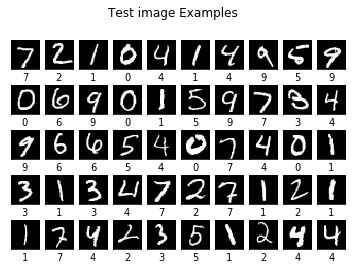

In [24]:
for i in range(50):
    l1_plot = plt.subplot(5, 10, i + 1)
    l1_plot.imshow(255 * X_test[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.gray)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    #l1_plot.set_xlabel('Class %s' % y_test[i].decode())
    l1_plot.set_xlabel('%i' % int(y_test[i]))
plt.suptitle('Test image Examples')
plt.show()

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train.shape

(60000, 784)

In [27]:
#train and test classifier
# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50. / 1000,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)
# Train the classifier
clf.fit(X_train, y_train)

#Evaluate the classifier
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 16.47%
Test score with L1 penalty: 0.8913


In [28]:
y_train

array([5, 0, 4, ..., 5, 6, 8])

In [29]:
## For analysis show also the confusion matrix

from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test)
cfm = confusion_matrix(y_test, y_predict)
print (cfm)

[[ 952    0    1    2    0   10   11    1    3    0]
 [   0 1103    3    3    1    1    4    0   20    0]
 [  16   21  870   23   19    0   17   23   40    3]
 [   5    8   20  891    1   31    8   19   19    8]
 [   2   10    4    0  903    2   13    2    3   43]
 [  14    9    6   44   23  724   20   14   23   15]
 [  16    9    9    0   11   19  889    1    4    0]
 [   1   34   18    5   12    0    1  916    1   40]
 [  10   30    9   29   20   37    9   17  796   17]
 [  18   10    4   13   55    5    0   32    3  869]]


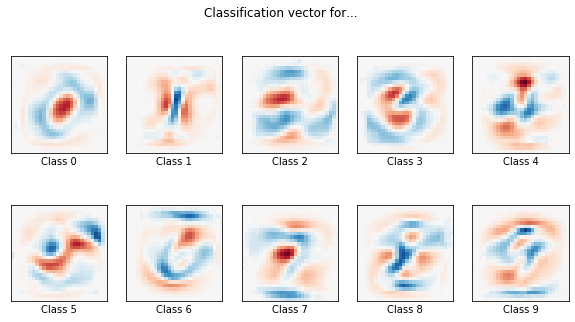

In [30]:
# Bonus 2: Visualization of the weights
# This is only possible for simple classifiers

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')
plt.show()

In [31]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization


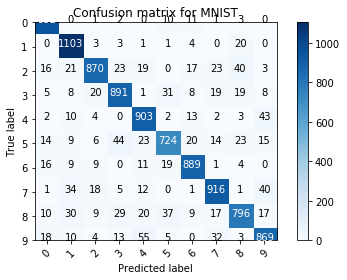

In [32]:
plot_confusion_matrix(cfm, classes=range(10), 
                      title='Confusion matrix for MNIST')

In [44]:
import pandas as pd
import imageio

class SimpleDataset():
    def __init__(self, data_path, csv_name, transform = None ):


        data_path = '/Users/wang/Desktop/Course 2019 fall/Computer Vision/lab7/out/'
        csv_name ='label.csv'

        # Set path
        self.data_path = data_path
        # Read the csv file
        self.data_info = pd.read_csv(data_path + csv_name, header=None)
        # First column contains the image paths
        self.image_arr = np.asarray(self.data_info.iloc[:, 0])
        # Second column is the labels
        self.label_arr = np.asarray(self.data_info.iloc[:, 1])
        # Calculate len
        self.data_len = len(self.data_info.index)
        
    def __getitem__(self, index):
        # Get image name from the pandas df
        single_image_name = self.image_arr[index]
        # Open image
        img_as_img = imageio.imread(self.data_path + single_image_name)
        
        # Get label(class) of the image based on the cropped pandas column
        single_image_label = self.label_arr[index]
        
        return (img_as_img, single_image_label)

    def __len__(self):
        return self.data_len

In [45]:
mydata = SimpleDataset( "./idata/", "labels.csv")

#splitting into images and labels 
X = []
y = []
for i in range(len(mydata)):
    X.append(mydata[i][0])
    y.append((mydata[i][1]))

#converting into numpy arrays to enable easy reshaping and other array operations
    
X = np.asarray(X)
print("Shape of the input image", X.shape)
y= np.asarray(y)

Shape of the input image (50, 28, 28)


In [4]:
import numpy as np
for i in range(50):
    ximg = np.asarray(mydata[i][0])
    l1_plot = plt.subplot(5, 10, i + 1)
    l1_plot.imshow(ximg, interpolation='nearest', cmap=plt.cm.gray) 
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('%i' % int(mnist_testset[i][1]))
plt.suptitle('my data Examples') 
plt.show()

NameError: name 'mydata' is not defined

In [36]:
#reshaping the array into flattened 784 array as an input for prediciton by the logistic regression classifier
X = X.reshape(X.shape[0], 784)
X = X / 255.
#data standardiation with the training set statistics is required for this clasifier
X = scaler.transform(X)

y_pred = clf.predict(X)

score = clf.score(X, y)

print("Test score with L1 penalty: %.4f" % score)
print("y_predicted_values", y_pred)
print("y_labels", y)

Test score with L1 penalty: 0.4200
y_predicted_values [0 0 0 0 0 1 1 1 1 1 0 8 2 2 1 1 3 3 1 1 5 1 6 1 1 1 5 5 1 1 1 6 5 6 8 1 7
 1 3 1 5 5 8 1 3 9 1 1 1 5]
y_labels [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 9 9 9 9 9]


As the result shown above, the accuracy of the classifier on my handwritten dataset is 42%. which I think is not bad. To improve the testing accuracy, I tried to modify several parameters in the logistic regression classifier, I changed the solver to newton-cg, lbfgs and sag, but in my case none of them beat saga. I also changed the penalty term to further avoid overfitting. Last but not least, I added a max_iter term and set it to 100 iteration. It gives a better testing result of 44%

In [42]:
clf = LogisticRegression(C=50. / 3000,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', max_iter=100, tol=0.1)
# Train the classifier
clf.fit(X_train, y_train)

#Evaluate the classifier
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 53.99%
Test score with L1 penalty: 0.9165


In [46]:
#reshaping the array into flattened 784 array as an input for prediciton by the logistic regression classifier
X = X.reshape(X.shape[0], 784)
X = X / 255.
#data standardiation with the training set statistics is required for this clasifier
X = scaler.transform(X)

y_pred = clf.predict(X)

score = clf.score(X, y)

print("Test score with L1 penalty: %.4f" % score)
print("y_predicted_values", y_pred)
print("y_labels", y)

Test score with L1 penalty: 0.4400
y_predicted_values [0 0 0 0 0 1 1 1 1 1 2 8 2 2 1 1 3 3 1 1 5 1 6 1 1 7 5 5 6 1 1 6 6 6 6 1 7
 1 3 1 5 5 1 1 5 4 1 1 1 5]
y_labels [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 9 9 9 9 9]


Confusion matrix, without normalization


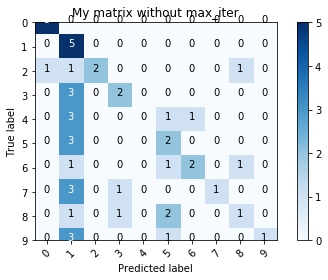

In [37]:
y_pred = clf.predict(X)
cfm = confusion_matrix(y, y_pred)
plot_confusion_matrix(cfm, classes=range(10), 
                      title='My matrix without max_iter')

Confusion matrix, without normalization


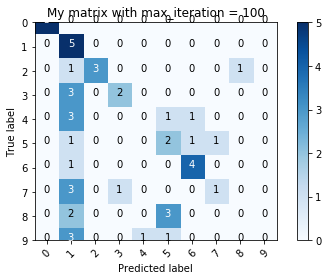

In [47]:
y_pred = clf.predict(X)
cfm = confusion_matrix(y, y_pred)
plot_confusion_matrix(cfm, classes=range(10), 
                      title='My matrix with max_iteration = 100')

To better visualize the predicting result, I computed the confusion matrix, from the matrix we can see the true label and it's predicted label. we can see that the predition of character 0 and 1 are pretty good. The classifier got them 100% correct. However, the classifier does not seem to work very well with character 4,8 and 9. For some reason, most of the mispredict label is 1. So the classifier has problem diffientiate 1 and other characters.